# WaterNet basics

This notebook presents the basic functionalities of the following classes:
* WNImage:a high level representation of a Sentinel-2 image originally stored in the PlanetaryComputer.
* WNMask
* WNSegmentationItem

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

from waternet.wndataset import *
from waternet.wnmask import *
from waternet.wnimage import *

from tqdm.notebook import tqdm

import time 

## WNImage

The WNImage open a S2 tile from its tile and exact sensing date. If we don't know a specific date, we can use `WNImage.search_catalog` to find out images within a range

In [80]:
WNImage.search_tile(tile='22KEV', date_range='2022-08')

[<Item id=S2A_MSIL2A_20220830T133201_R081_T22KEV_20220901T031504>,
 <Item id=S2B_MSIL2A_20220825T133149_R081_T22KEV_20220826T055538>,
 <Item id=S2A_MSIL2A_20220820T133201_R081_T22KEV_20220821T064817>,
 <Item id=S2B_MSIL2A_20220815T133149_R081_T22KEV_20220816T000407>,
 <Item id=S2A_MSIL2A_20220810T133201_R081_T22KEV_20220811T182452>,
 <Item id=S2B_MSIL2A_20220805T133149_R081_T22KEV_20220806T052931>]

In [81]:
img = WNImage.from_tile(tile='22KEV', str_date='2022-08-25')
img

Img: S2B_MSIL2A_20220825T133149_R081_T22KEV_20220826T055538
Loaded bands: []

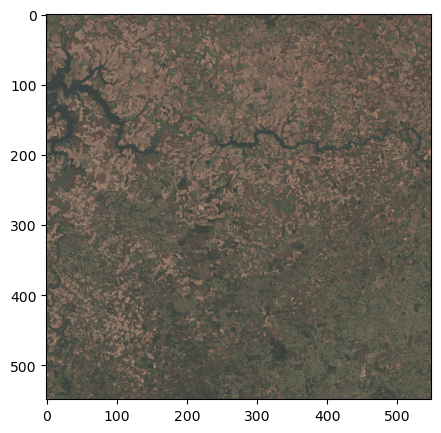

In [82]:
img.plot(figsize=(5, 5))

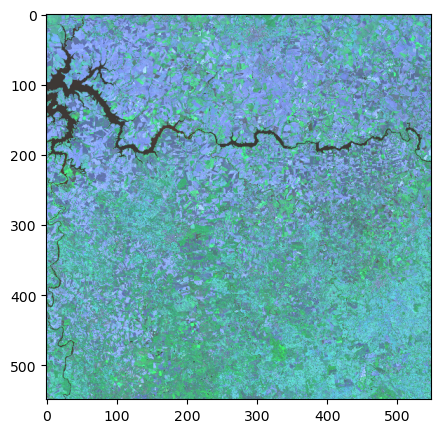

In [83]:
img.plot(bands=['B04', 'B08', 'B11'], figsize=(5, 5))

In [101]:
img.patchify(bands=['B04', 'B08'], patch_size=(512, 512), step=256)

In [103]:
# Checking the size of the patches
img.patch_size, img.patches.shape

((512, 512, 2), (400, 512, 512, 2))

In [105]:
# since we have the patches, we can verify the length of the image
len(img)

400

In [106]:
img._patches.shape

(20, 20, 1, 512, 512, 2)

In [107]:
import matplotlib.pyplot as plt

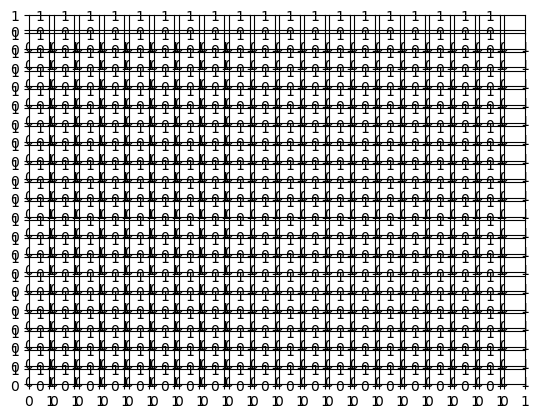

In [108]:
fig, ax = plt.subplots(20, 20)

In [72]:
img.patches.reshape((-1, 512, 512)).shape

(400, 512, 512)

In [77]:
img.patches.shape[-3:-1]

(512, 512)

In [79]:
img.patches

AttributeError: 'WNImage' object has no attribute '_patches'

In [2]:
dset = WNDataSet.from_masks(masks_path='/home/jovyan/tmp3', pattern='*202006*')

Matching imgs/masks:   0%|          | 0/4 [00:00<?, ?it/s]

In [3]:
dset.items

[S2A_MSIL2A_20200601T133231_R081_T22KEV_20200825T173748->S2A_MSIL2A_20200601T133231_R081_T22KEV_watermask.tif,
 S2A_MSIL2A_20200621T133231_R081_T22KEV_20200823T131438->S2A_MSIL2A_20200621T133231_R081_T22KEV_watermask.tif,
 S2A_MSIL2A_20200611T133231_R081_T22KEV_20200826T233107->S2A_MSIL2A_20200611T133231_R081_T22KEV_watermask.tif,
 S2B_MSIL2A_20200616T133229_R081_T22KEV_20200823T003810->S2B_MSIL2A_20200616T133229_R081_T22KEV_watermask.tif]

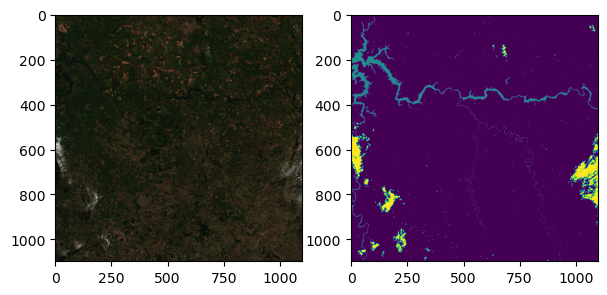

In [4]:
dset.items[0].plot(figsize=(7, 7))

In [9]:
dset.bands = ['B04', 'B03', 'B02', 'B08', 'B11']

In [13]:
dset[1][0].shape

(5, 256, 256)

Loaded sucessfully


In [15]:
dset.items

[S2A_MSIL2A_20200601T133231_R081_T22KEV_20200825T173748->S2A_MSIL2A_20200601T133231_R081_T22KEV_watermask.tif,
 S2A_MSIL2A_20200621T133231_R081_T22KEV_20200823T131438->S2A_MSIL2A_20200621T133231_R081_T22KEV_watermask.tif,
 S2A_MSIL2A_20200611T133231_R081_T22KEV_20200826T233107->S2A_MSIL2A_20200611T133231_R081_T22KEV_watermask.tif,
 S2B_MSIL2A_20200616T133229_R081_T22KEV_20200823T003810->S2B_MSIL2A_20200616T133229_R081_T22KEV_watermask.tif]

In [16]:
len(dset)

7056

In [17]:
import patchify

In [18]:
patchify.patchify?

Signature:
patchify.patchify(
    image: numpy.ndarray,
    patch_size: Union[Tuple[int, int], Tuple[int, int, int]],
    step: int = 1,
) -> numpy.ndarray
Docstring:
Split a 2D or 3D image into small patches given the patch size.

Parameters
----------
image: the image to be split. It can be 2d (m, n) or 3d (k, m, n)
patch_size: the size of a single patch
step: the step size between patches

Examples
--------
>>> image = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
>>> patches = patchify(image, (2, 2), step=1)  # split image into 2*3 small 2*2 patches.
>>> assert patches.shape == (2, 3, 2, 2)
>>> reconstructed_image = unpatchify(patches, image.shape)
>>> assert (reconstructed_image == image).all()
File:      /srv/conda/envs/notebook/lib/python3.10/site-packages/patchify/__init__.py
Type:      function


In [39]:
dset.clear()

In [41]:
bar = tqdm(total=len(dset))
for i in range(len(dset)):
    bar.desc = f'Item {i}'
    bar.update()
    item = dset[i]
    
    time.sleep(0.01)

  0%|          | 0/7056 [00:00<?, ?it/s]

Loading image 1 in background
Cleared image 0
Loading image 2 in background
Loaded sucessfully
Cleared image 1
Loading image 3 in background
Loaded sucessfully
Cleared image 2
Loading image 0 in background
Loaded sucessfully
Loaded sucessfully


In [7]:
dset[100]

(array([[[0.0614, 0.0614, 0.0622, ..., 0.0519, 0.0517, 0.0501],
         [0.063 , 0.0604, 0.0587, ..., 0.0523, 0.0525, 0.054 ],
         [0.0653, 0.0625, 0.061 , ..., 0.0476, 0.051 , 0.0554],
         ...,
         [0.1982, 0.2066, 0.2116, ..., 0.0624, 0.0661, 0.0713],
         [0.1886, 0.2014, 0.213 , ..., 0.0669, 0.0697, 0.0654],
         [0.187 , 0.1936, 0.2056, ..., 0.0716, 0.0749, 0.0666]],
 
        [[0.0818, 0.0837, 0.0842, ..., 0.0715, 0.0722, 0.0691],
         [0.0798, 0.0846, 0.0842, ..., 0.072 , 0.0714, 0.0746],
         [0.0849, 0.0835, 0.0829, ..., 0.0714, 0.071 , 0.0719],
         ...,
         [0.1302, 0.1378, 0.1396, ..., 0.0637, 0.0662, 0.0736],
         [0.125 , 0.1354, 0.1422, ..., 0.065 , 0.0684, 0.0686],
         [0.1216, 0.1284, 0.1382, ..., 0.0651, 0.0723, 0.068 ]],
 
        [[0.0394, 0.0382, 0.0381, ..., 0.0296, 0.0301, 0.0314],
         [0.0374, 0.0395, 0.0384, ..., 0.0336, 0.034 , 0.0311],
         [0.0402, 0.0388, 0.0373, ..., 0.0286, 0.0339, 0.0316],
      

In [15]:
dset.items[0].img

Img: S2A_MSIL2A_20200601T133231_R081_T22KEV_20200825T173748
Loaded bands: ['B04', 'B03', 'B02', 'B08', 'B11']

In [17]:
dset[101][1].shape

(256, 256)

In [19]:
import gc

In [24]:
del dset.items[0].img.loaded_bands['B04']

In [48]:
%%timeit
dset.clear()

527 ms ± 9.08 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
dset.items[1].mask.clear()

In [31]:
dset.items[0].img.loaded_bands

{}

In [53]:
dset.items[0].mask

In [14]:
dset.processes

[<Future at 0x7f7e103cfb50 state=finished returned NoneType>,
 <Future at 0x7f7e08c3c9a0 state=finished returned NoneType>,
 <Future at 0x7f7e08c2c5b0 state=finished returned NoneType>]

In [40]:
dset.items[0].img

Img: S2A_MSIL2A_20200601T133231_R081_T22KEV_20200825T173748
Loaded bands: []

In [55]:
from datetime import datetime, timedelta
dset.clear()
start = datetime.now()
dset[2000]
dset[4000]
print(datetime.now()-start)

0:00:21.323756


In [52]:
list(map(lambda x: x.status, dset.items))

['Empty', 'Loaded', 'Loaded', 'Loading']

In [54]:
dset.processes

[<Future at 0x7f7e103cfb50 state=finished returned NoneType>,
 <Future at 0x7f7e08c3c9a0 state=finished returned NoneType>,
 <Future at 0x7f7e08c2c5b0 state=finished returned NoneType>,
 <Future at 0x7f7e089e1400 state=finished returned NoneType>,
 <Future at 0x7f7e08a78b80 state=finished returned NoneType>,
 <Future at 0x7f7e1009d8b0 state=finished returned NoneType>,
 <Future at 0x7f7e0a449490 state=finished returned NoneType>,
 <Future at 0x7f7e1009d430 state=finished returned NoneType>,
 <Future at 0x7f7e08a7d5b0 state=finished returned NoneType>]

In [43]:
item = dset.items[0]

In [45]:
item.img.loaded_bands

{'B04': array([[310, 318, 360, ..., 725, 754, 716],
        [325, 313, 352, ..., 720, 725, 705],
        [297, 323, 318, ..., 673, 666, 656],
        ...,
        [181, 188, 174, ..., 251, 225, 286],
        [195, 220, 197, ..., 252, 315, 255],
        [190, 234, 202, ..., 264, 353, 214]], dtype=uint16),
 'B03': array([[514, 538, 552, ..., 663, 647, 647],
        [533, 528, 543, ..., 646, 649, 644],
        [559, 552, 536, ..., 637, 652, 634],
        ...,
        [315, 388, 326, ..., 408, 362, 388],
        [337, 347, 370, ..., 298, 434, 361],
        [333, 385, 369, ..., 354, 454, 318]], dtype=uint16)}

In [35]:
import time

In [36]:
time.sleep

<function time.sleep>

In [11]:
mask = WNMask('/home/jovyan/tmp3/S2A_MSIL2A_20200601T133231_R081_T22KEV_watermask.tif')

In [12]:
mask.ds

<open DatasetReader name='/home/jovyan/tmp3/S2A_MSIL2A_20200601T133231_R081_T22KEV_watermask.tif' mode='r'>

In [26]:
from tqdm.notebook import tqdm

In [19]:
item = dset.items[0]
item

In [22]:
item.img.stac_item.id

'S2A_MSIL2A_20200601T133231_R081_T22KEV_20200825T173748'

In [24]:
item.mask.path.name

'S2A_MSIL2A_20200601T133231_R081_T22KEV_watermask.tif'

In [30]:
index=Path('/home/jovyan/tmp3/').rglob('*202006*')

In [32]:
len(index)

TypeError: object of type 'generator' has no len()

In [80]:
mask = WNMask(df.index[0])

In [108]:
item = WNSegmentationItem.from_mask(df.index[3])

In [109]:
item.img

Img: S2B_MSIL2A_20200616T133229_R081_T22KEV_20200823T003810
Loaded bands: []

In [93]:
from datetime import datetime


In [97]:
dt = (datetime.now())

In [100]:
dt.date().isoformat()

'2022-09-02'

In [82]:
mask.properties

{'satellite': 'S2A',
 'tile': '22KEV',
 'sensor': 'MSIL2A',
 'date': '20200601',
 'year': '2020',
 'month': '06',
 'day': '01',
 'time': '133231',
 'iso_datetime': '20200601T133231'}

In [64]:
p = Path('/home/jovyan/tmp3')

In [70]:
import pandas as pd

In [73]:
ids = list(range(4))
ids

[0, 1, 2, 3]

In [78]:
df = pd.DataFrame(data={'id': ids}, index=p.rglob('*202006*'))
df

id
/home/jovyan/tmp3/S2A_MSIL2A_20200601T133231_R081_T22KEV_watermask.tif   0
/home/jovyan/tmp3/S2A_MSIL2A_20200621T133231_R081_T22KEV_watermask.tif   1
/home/jovyan/tmp3/S2A_MSIL2A_20200611T133231_R081_T22KEV_watermask.tif   2
/home/jovyan/tmp3/S2B_MSIL2A_20200616T133229_R081_T22KEV_watermask.tif   3

# WNImage test

In [52]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
import waternet 

from pystac_client import Client, ItemSearch
from geojson import Point

In [7]:
import matplotlib.pyplot as plt
from waternet.wnimage import WNImage

In [8]:
%time img = WNImage.from_tile('31TCM', '2018-09-15')
img

CPU times: user 38.5 ms, sys: 157 µs, total: 38.6 ms
Wall time: 2.39 s


Img: S2B_MSIL2A_20180916T105649_R094_T31TCM_20201009T014903
Loaded bands: []

In [9]:
img.get_band('B03').shape

(5490, 5490)

In [10]:
img

Img: S2B_MSIL2A_20180916T105649_R094_T31TCM_20201009T014903
Loaded bands: ['B03']

In [11]:
%time cube = img.as_cube(['B04', 'B03', 'B02', 'B05'])

CPU times: user 1.16 s, sys: 349 ms, total: 1.51 s
Wall time: 3.04 s


In [12]:
cube.shape

(5490, 5490, 4)

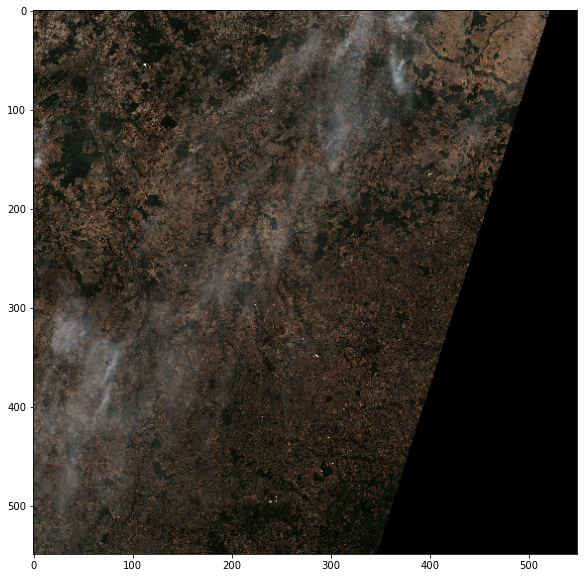

In [13]:
img.plot(['B04', 'B03', 'B02'])

In [14]:
from patchify import patchify, unpatchify

In [15]:
patches = patchify(cube, (549, 549, 3), step=549)

In [16]:
patches.shape

(10, 10, 1, 549, 549, 3)

In [17]:
reconstructed = unpatchify(patches, cube.shape)

In [18]:
reconstructed.shape

(5490, 5490, 4)

In [19]:
patches.reshape(-1, 549, 549, 3).shape

(100, 549, 549, 3)

In [20]:
import sys

In [21]:
"patchify" in sys.modules.keys()

True

# WNDataset test

In [22]:
# open one mask

import rasterio as rio
from pathlib import Path
import numpy as np

from waternet.wndataset import *

In [23]:
mask = WNMask('tmp3/S2B_MSIL2A_20180915T133219_R081_T22KEV_watermask.tif')

In [24]:
mask.mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 2, 0, 0],
       ...,
       [2, 2, 2, ..., 2, 0, 0],
       [2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0]], dtype=uint8)

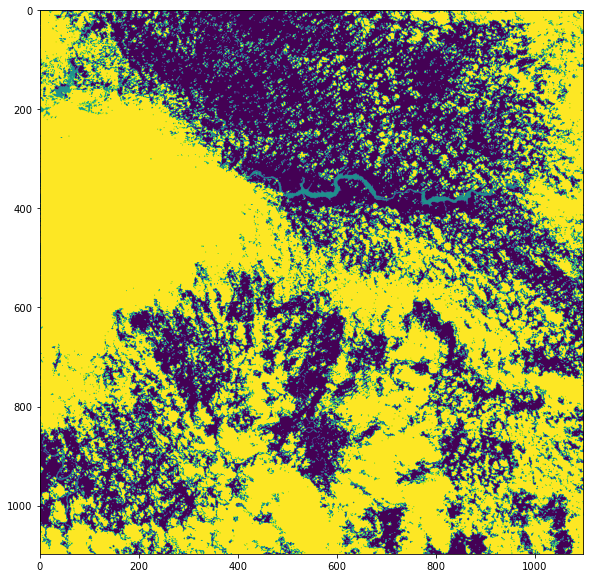

In [25]:
mask.plot()

In [26]:
item = WNSegmentationItem.from_mask('tmp3/S2B_MSIL2A_20180915T133219_R081_T22KEV_watermask.tif')

In [27]:
item.shape

(10980, 10980)

In [28]:
item.img.as_cube(['B04', 'B03', 'B02']).shape

(10980, 10980, 3)

In [29]:
len(item)

1764

In [30]:
item.patchify(['B04', 'B03', 'B02'])

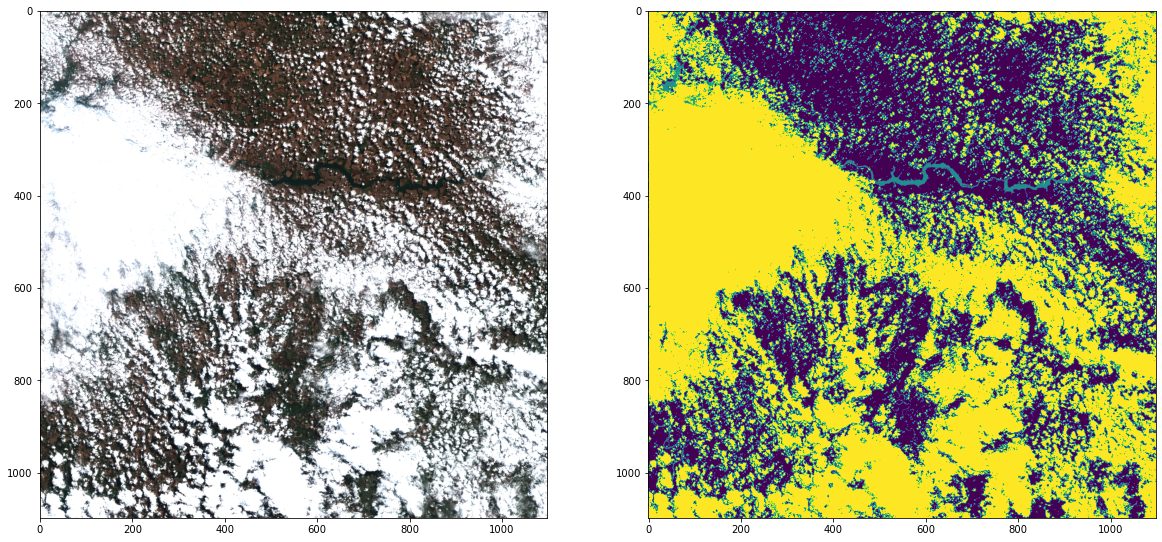

In [31]:
item.plot()

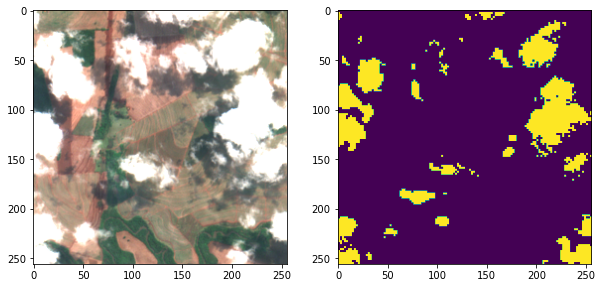

In [32]:
item.plot_patch(10, bright=5.)

In [33]:
from fastai.vision.all import *

In [39]:
# del dl
device = 'cuda:0'
device = 'cpu'
dl = DataLoader(dataset=item, bs=4, device=device)

In [40]:
dl.do_item(0)[1].shape

(256, 256)

In [41]:
item[0][0].dtype

dtype('float32')

In [42]:
b = dl.create_batch([item[0], item[1], item[2]])
b[0].dtype

torch.float32

In [43]:
t = dl.one_batch()[0]
t

tensor([[[[0.3566, 0.3542, 0.3618,  ..., 0.2354, 0.2268, 0.2114],
          [0.3462, 0.3470, 0.3552,  ..., 0.2192, 0.2170, 0.2018],
          [0.3482, 0.3398, 0.3254,  ..., 0.2202, 0.2054, 0.1974],
          ...,
          [0.5692, 0.5716, 0.6040,  ..., 0.4340, 0.4400, 0.4296],
          [0.5944, 0.5888, 0.6112,  ..., 0.4156, 0.4296, 0.4276],
          [0.6016, 0.5908, 0.6172,  ..., 0.4084, 0.4096, 0.4132]],

         [[0.3646, 0.3550, 0.3654,  ..., 0.2604, 0.2532, 0.2310],
          [0.3548, 0.3538, 0.3666,  ..., 0.2468, 0.2442, 0.2264],
          [0.3528, 0.3426, 0.3338,  ..., 0.2430, 0.2388, 0.2236],
          ...,
          [0.5512, 0.5648, 0.5980,  ..., 0.4400, 0.4464, 0.4352],
          [0.5888, 0.5856, 0.6112,  ..., 0.4196, 0.4320, 0.4320],
          [0.6000, 0.5960, 0.6212,  ..., 0.4090, 0.4232, 0.4208]],

         [[0.3784, 0.3696, 0.3770,  ..., 0.2632, 0.2554, 0.2352],
          [0.3692, 0.3692, 0.3830,  ..., 0.2482, 0.2476, 0.2256],
          [0.3686, 0.3652, 0.3526,  ..., 0

In [44]:
# for b in dl:
#     print(b[0].shape)

In [45]:
def loss_fn(pred, targ):
#     pdb.set_trace()
    
    return torch.nn.functional.cross_entropy(pred, targ.squeeze(1).type(torch.long))

In [46]:
dls = DataLoaders(dl, dl)

In [47]:
learner = unet_learner(dls, resnet18, normalize=False, n_out=5, pretrained=True, loss_func=loss_fn)

/srv/conda/envs/notebook/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [48]:
learner.summary()

DynamicUnet (Input shape: 4 x 3 x 256 x 256)
Layer (type)         Output Shape         Param #    Trainable 
                     4 x 64 x 128 x 128  
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     4 x 64 x 64 x 64    
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                      

In [49]:
pred = learner.forward(b[0])

pred.shape

torch.Size([3, 5, 256, 256])

In [56]:
pred = learner.predict(b[0])

torch.Size([1, 3, 3, 256, 256])
torch.Size([1, 5, 256, 256])
2


In [57]:
pred[0].shape

torch.Size([1, 3, 3, 256, 256])

In [58]:
learner.cuda()

DynamicUnet(
  (layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05

SuggestedLRs(valley=0.0002754228771664202)

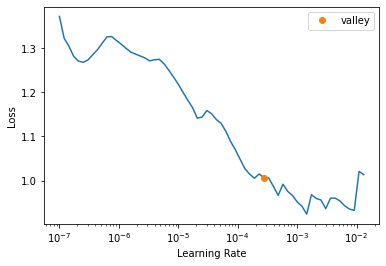

In [162]:
learner.cuda()
learner.lr_find()

In [164]:
learner.fit_one_cycle(10, lr_max=slice(1e-5, 1e-3))

In [165]:
learner.fit_one_cycle(10, lr_max=slice(1e-5, 1e-3))

In [65]:
pred = learner.predict(b[0])

In [67]:
pred[0].shape, pred[1].shape

(torch.Size([1, 3, 3, 256, 256]), torch.Size([5, 256, 256]))

In [71]:
b[0].shape

torch.Size([4, 3, 256, 256])

In [72]:
len(pred)

3

In [122]:
b[0][None, ...].shape

(1, 3, 256, 256)

In [80]:
pred = learner.model.forward(b[0].cuda())

In [84]:
pred.shape

torch.Size([4, 5, 256, 256])

In [124]:
pred = learner.model.forward(Tensor(b[0][None, ...]).cuda())

In [125]:
pred.shape

torch.Size([1, 5, 256, 256])

In [117]:
b[0].shape

(3, 256, 256)

In [175]:
idx = slice(100, 110)

In [178]:
for i in range(idx.start, idx.stop):
    pass

In [180]:
i = range(1, 10)

In [ ]:
idxs = range(1, 10)

fig, ax = plt.subplots(len(idxs), 3, figsize=(15, len(idxs) * 5))

for i, idx in enumerate(idxs):
    inpt, targ = dls.create_item(idx)
    pred = learner.model.forward(Tensor(inpt[None, ...]).cuda()).squeeze()

    rgb = inpt.transpose((1, 2, 0))*2.
    rgb[rgb > 1] = 1
    ax[i][0].imshow(rgb)
    ax[i][1].imshow(targ)
    ax[i][2].imshow(pred.argmax(dim=0).cpu())

In [139]:
t = pred[idx]

IndexError: index 31 is out of bounds for dimension 0 with size 5

In [109]:
t.argmax(dim=0)

TensorBase([[0, 2, 2,  ..., 2, 2, 2],
        [0, 2, 2,  ..., 2, 2, 2],
        [0, 0, 0,  ..., 2, 2, 2],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [2, 2, 0,  ..., 0, 2, 2],
        [2, 2, 0,  ..., 0, 2, 2]], device='cuda:0')

In [ ]:
dls.loaders

In [ ]:
dls.valid_ds

In [ ]:
b[0].shape

In [ ]:
b[1].shape

In [ ]:
b = dl.do_batch([item[0], item[1], item[2]])

In [ ]:
b[0].shape